In [2]:
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
MOVIE_PATH = DATA_PATH + 'Control 050721/'
GRAPH_PATH = 'C:Users/amityu/Gel_Sheet_Graph/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.filters import gaussian
from tqdm.notebook import trange, tqdm
import pandas as pd
import movie_structure
from concurrent.futures import ThreadPoolExecutor
import preprocessing
import autocorrelation_and_structure_factor_IK_20220103 as iac
import importlib
import seaborn as sns
from skimage import filters
#from p_tqdm import p_map
from scipy.ndimage import median_filter


In [6]:
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy', mmap_mode='r+')
open_mask = np.load(MOVIE_PATH + 'np/open_mask.npy', mmap_mode='r+')

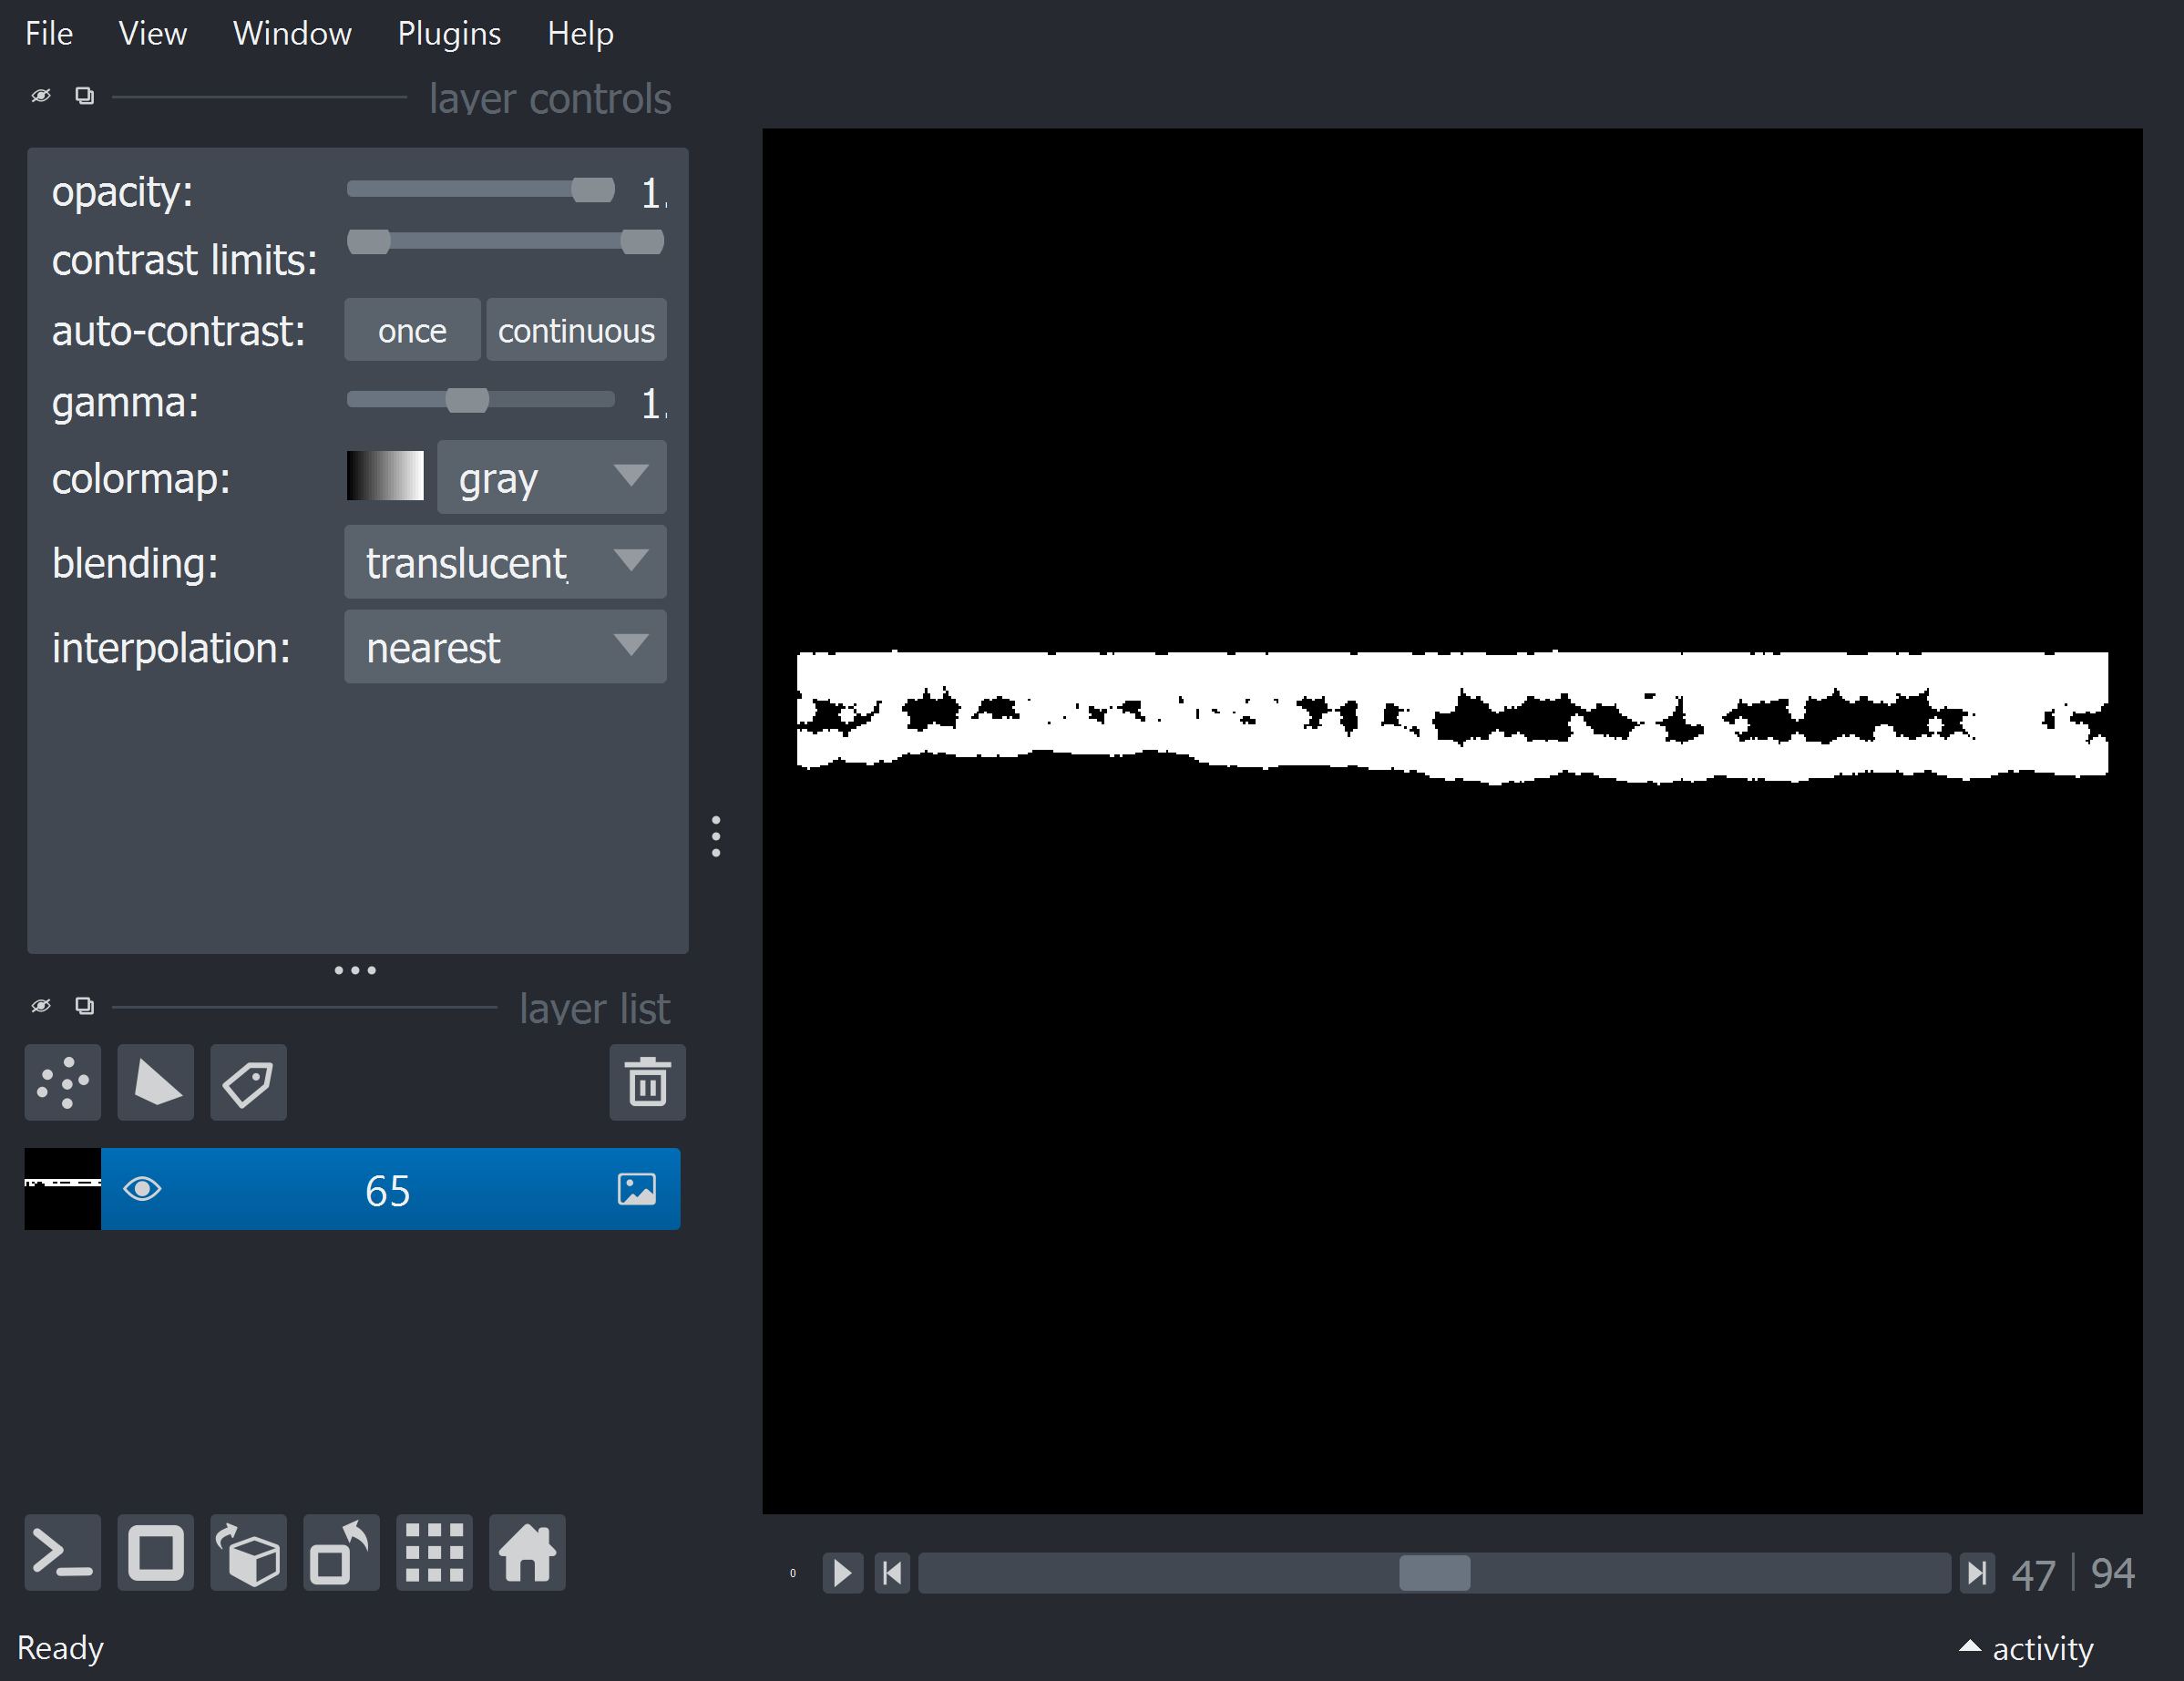

In [4]:
import napari

viewer = napari.Viewer()
image = mask[:, :, :, 256]
viewer.add_image(image, name='65')
napari.utils.nbscreenshot(viewer)

In [5]:
from skimage import morphology
image = mask[47, :, :, 256]
open = morphology.binary_opening(image, morphology.disk(3))
viewer.add_image(open, name='open')


<Image layer 'open' at 0x2cbff5e82e0>

In [7]:
open_list = []
open_mask = np.zeros(mask.shape)
for t in trange(len(mask)):
    for x in range(mask.shape[3]):
        open_mask[t,:,:,x] = morphology.binary_opening(mask[t,:,:,x], morphology.disk(3))

viewer.add_image(open_mask[:,:,:,30], name='open_30')


<Image layer 'open_30' at 0x2cbfcda29e0>

In [7]:
viewer.add_image(open_mask[:,:,:,256], name='open_256')


<Image layer 'open_256' at 0x268d0dc9480>